### Importing libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [49]:
df = sns.load_dataset("titanic")

### Data Understanding

In [50]:
df.shape

(891, 15)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
352,0,3,male,15.0,1,1,7.2292,C,Third,child,False,NaN,Cherbourg,no,False
520,1,1,female,30.0,0,0,93.5000,S,First,woman,False,B,Southampton,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
297,0,1,female,2.0,1,2,151.5500,S,First,child,False,C,Southampton,no,False
443,1,2,female,28.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
747,1,2,female,30.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
420,0,3,male,NaN,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
805,0,3,male,31.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
650,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


### Data Wrangling

#### Missing Values

In [54]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### Understanding age to fill the most appropirate value

In [55]:
df[df["age"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [56]:
df[df["age"].isnull()].groupby(["who", "embark_town"])["sex"].count()

who    embark_town
man    Cherbourg      26
       Queenstown     25
       Southampton    73
woman  Cherbourg      12
       Queenstown     24
       Southampton    17
Name: sex, dtype: int64

In [57]:
df[df["age"].isnull()].groupby("who")["sex"].describe()

,count,unique,top,freq
who,,,,
man,124,1,male,124
woman,53,1,female,53


In [58]:
df.groupby(["who"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
who,,,,,,,,
child,83.0,6.369518,4.729063,0.42,2.0,5.0,9.5,15.0
man,413.0,33.173123,12.906908,16.00,23.0,30.0,40.0,80.0
woman,218.0,32.000000,11.495441,16.00,23.0,30.0,39.0,63.0


In [59]:
df.age.median()

28.0

In [60]:
df["age"].fillna(df.age.median(), inplace=True)

#### Outlier Detection and Removal

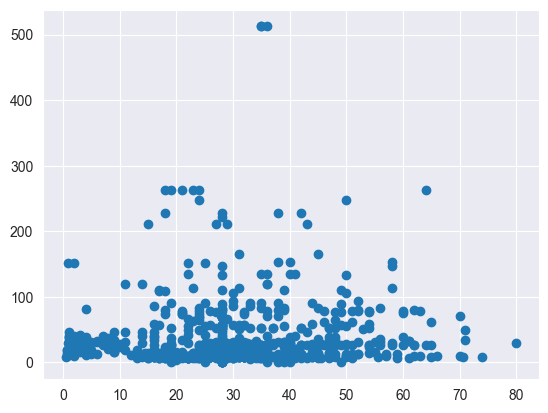

In [61]:
plt.scatter(df["age"], df["fare"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18d72084090>,
 'caps': [<matplotlib.lines.Line2D at 0x18d72085310>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d72067690>,
 'medians': [<matplotlib.lines.Line2D at 0x18d72086550>,
 'fliers': [<matplotlib.lines.Line2D at 0x18d72086cd0>,
 'means': []}

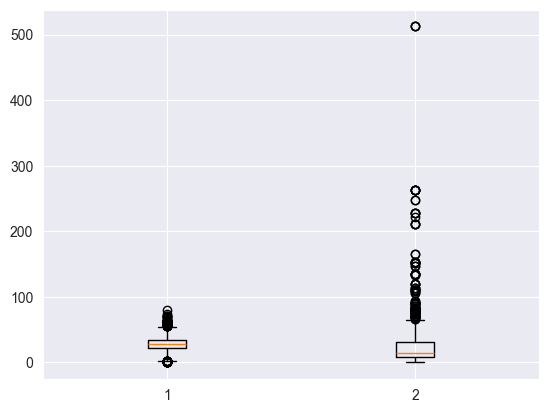

In [62]:
plt.boxplot(df[["age", "fare"]])

In [63]:
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1

fence_low = q1 - 1.5 * iqr
fence_high = q3 + 1.5 * iqr

df = df.loc[(df['fare'] > fence_low) & (df['fare'] < fence_high)].reset_index(drop=True)


#### Unique values

In [64]:
print(df["embarked"].unique(), df["embark_town"].unique())
df[["embarked", "embark_town"]].sample(5)

['S' 'Q' 'C'] ['Southampton' 'Queenstown' 'Cherbourg']


,embarked,embark_town
363,S,Southampton
122,C,Cherbourg
726,S,Southampton
544,Q,Queenstown
465,S,Southampton


In [65]:
print(df["pclass"].unique(), df["class"].unique())
df[["pclass", "class"]].sample(5)

[3 1 2] ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


,pclass,class
523,1,First
658,3,Third
440,3,Third
734,3,Third
178,3,Third


In [66]:
print(df["sibsp"].unique(), df["parch"].unique())
df[["sibsp", "parch"]].sample(5)

[1 0 3 4 2 5] [0 1 2 5 3 4 6]


,sibsp,parch
532,0,0
730,0,0
419,0,0
732,0,0
463,0,0


In [67]:
print(df["survived"].unique(), df["alive"].unique())
df[["survived", "alive"]].sample(10)

[0 1] ['no' 'yes']


,survived,alive
717,0,no
82,0,no
744,1,yes
393,0,no
730,0,no
361,0,no
142,0,no
237,0,no
592,0,no
486,0,no


#### Drop Features


In [68]:
# Dropping alone and adult_male because we can get same information from parch and who respectively, deck is insignificant with a lot of missing values, embarked and embark_town, pclass and class, alive and survived are same
df.drop(columns = ["alone","deck","embarked", "adult_male", "class", "alive"], inplace=True)

#### Converting data types

In [69]:
df[["embark_town", "sex", "who"]] = df[["embark_town", "sex", "who"]].astype("category")
df[["pclass", "sibsp", "age", "parch"]] = df[["pclass", "sibsp", "age", "parch"]].astype("uint8")
df[["fare"]] = df[["fare"]].astype("uint16")
df["survived"] = df[["survived"]].astype("bool")

### Exploratory Data Analysis

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    bool    
 1   pclass       775 non-null    uint8   
 2   sex          775 non-null    category
 3   age          775 non-null    uint8   
 4   sibsp        775 non-null    uint8   
 5   parch        775 non-null    uint8   
 6   fare         775 non-null    uint16  
 7   who          775 non-null    category
 8   embark_town  775 non-null    category
dtypes: bool(1), category(3), uint16(1), uint8(4)
memory usage: 8.1 KB


#### Survivors by Passenger Type

C:\Users\Shahzaib Khan\AppData\Local\Temp\ipykernel_20152\1246010431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_count = df[df["survived"] == True].groupby("who")["survived"].count()
C:\Users\Shahzaib Khan\AppData\Local\Temp\ipykernel_20152\1246010431.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_survivors_count = df[df["survived"] == False].groupby("who")["survived"].count()


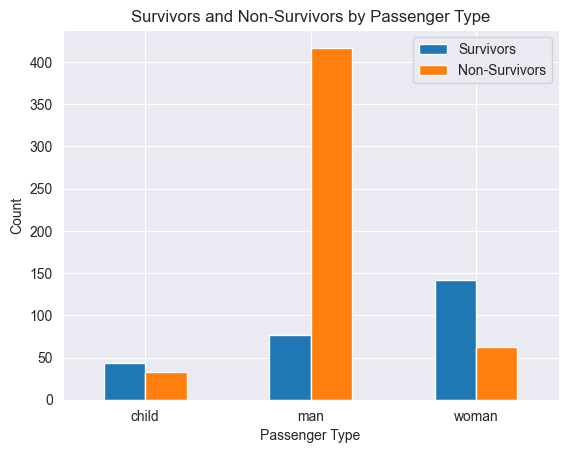

       Survivors  Non-Survivors
who                            
child         44             33
man           77            417
woman        142             62


In [71]:
survivors_count = df[df["survived"] == True].groupby("who")["survived"].count()
non_survivors_count = df[df["survived"] == False].groupby("who")["survived"].count()

combined_counts = pd.DataFrame({
    "Survivors": survivors_count,
    "Non-Survivors": non_survivors_count
})

combined_counts.plot(kind='bar')
plt.title("Survivors and Non-Survivors by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
print(combined_counts)

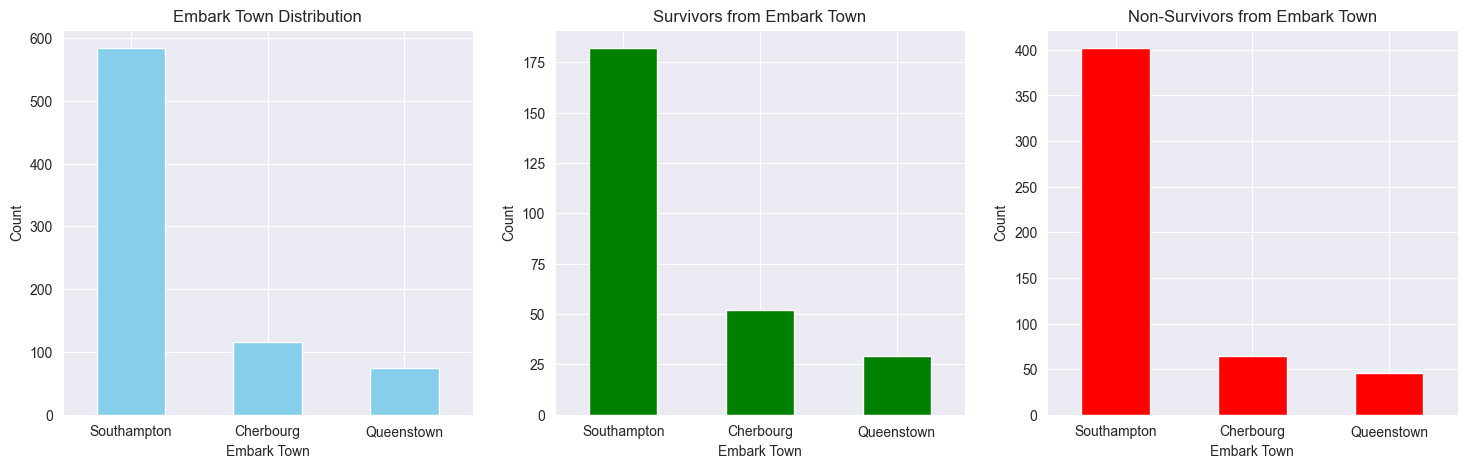

In [72]:
# Data preparation
total_count = df["embark_town"].value_counts()  # Total passengers by embark_town
survived_count = df[df["survived"] == 1]["embark_town"].value_counts()  # Survivors by embark_town
non_survivors_count = df[df["survived"] == 0]["embark_town"].value_counts()  # Non-survivors by embark_town

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot total distribution
total_count.plot(kind="bar", ax=axes[0], color="skyblue", title="Embark Town Distribution")
axes[0].set_xlabel("Embark Town")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(total_count.index)))
axes[0].set_xticklabels(total_count.index, rotation=0)

# Plot survivors distribution
survived_count.plot(kind="bar", ax=axes[1], color="green", title="Survivors from Embark Town")
axes[1].set_xlabel("Embark Town")
axes[1].set_ylabel("Count")
axes[1].set_xticks(range(len(total_count.index)))
axes[1].set_xticklabels(total_count.index, rotation=0)

# Plot non-survivors distribution
non_survivors_count.plot(kind="bar", ax=axes[2], color="red", title="Non-Survivors from Embark Town")
axes[2].set_xlabel("Embark Town")
axes[2].set_ylabel("Count")
axes[2].set_xticks(range(len(total_count.index)))
axes[2].set_xticklabels(total_count.index, rotation=0)

plt.show()